In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime

In [51]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d306989a3f38d34112a27a4ad7a1b2fc


In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | tukrah
Processing Record 18 of Set 1 | lumding
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | tanout
Processing Record 23 of Set 1 | umzimvubu
Cit

Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | ridgecrest
Processing Record 44 of Set 4 | karaul
City not found. Skipping...
Processing Record 45 of Set 4 | yunjinghong
City not found. Skipping...
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | cody
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | progreso
Processing Record 50 of Set 4 | mao
Processing Record 1 of Set 5 | lima
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | nueva gerona
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | yanam
Processing Record 7 of Set 5 | kindu
Processing Record 8 of Set 5 | hualmay
Processing Record 9 of Set 5 | khandyga
Processing Record 10 of Set 5 | columbus
Processing Record 11 of Set 5 | mandal
Processing Record 12 of Set 5 | dourbali
Processing Record 13 of Set 5 | port elizabeth
Proces

Processing Record 27 of Set 8 | kailua
Processing Record 28 of Set 8 | mende
Processing Record 29 of Set 8 | sulangan
Processing Record 30 of Set 8 | paracuru
Processing Record 31 of Set 8 | soyo
Processing Record 32 of Set 8 | shu
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | champa
Processing Record 36 of Set 8 | urumqi
Processing Record 37 of Set 8 | kihei
Processing Record 38 of Set 8 | xining
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | klyuchi
Processing Record 41 of Set 8 | bathsheba
Processing Record 42 of Set 8 | berbera
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | hit
Processing Record 45 of Set 8 | hue
Processing Record 46 of Set 8 | anzio
Processing Record 47 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 8 | fatsa
Processing Record 49 of Set 8 | nantucket
Processing Record 50 of Set 8 | linxi
Processing Record 1 of S

Processing Record 17 of Set 12 | tucumcari
Processing Record 18 of Set 12 | monterey
Processing Record 19 of Set 12 | codrington
Processing Record 20 of Set 12 | vaitape
Processing Record 21 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 22 of Set 12 | canoinhas
Processing Record 23 of Set 12 | cabedelo
Processing Record 24 of Set 12 | birao
Processing Record 25 of Set 12 | canguaretama
Processing Record 26 of Set 12 | araripe
Processing Record 27 of Set 12 | parainen
Processing Record 28 of Set 12 | basse
Processing Record 29 of Set 12 | farmington
Processing Record 30 of Set 12 | la palma
Processing Record 31 of Set 12 | pinar del rio
Processing Record 32 of Set 12 | galveston
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 12 | kurumkan
Processing Record 35 of Set 12 | boulder city
Processing Record 36 of Set 12 | guerrero negro
Processing Record 37 of Set 12 | bajil
Processing Record 38 of Set 12 | monrovia
Pr

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,37.40,78,20,11.41,US,2020-06-21 03:58:16
1,Hilo,19.73,-155.09,80.60,54,90,11.41,US,2020-06-21 03:58:16
2,Kruisfontein,-34.00,24.73,54.14,95,20,8.88,ZA,2020-06-21 03:58:16
3,Chokurdakh,70.63,147.92,91.33,19,0,8.68,RU,2020-06-21 03:58:16
4,Hobart,-42.88,147.33,53.01,87,75,6.93,AU,2020-06-21 03:54:42
5,Hermanus,-34.42,19.23,57.00,94,15,8.99,ZA,2020-06-21 03:57:02
6,Upernavik,72.79,-56.15,38.70,76,0,8.16,GL,2020-06-21 03:56:00
7,Bengkulu,-3.80,102.27,84.31,65,100,1.90,ID,2020-06-21 03:53:38
8,Avarua,-21.21,-159.78,73.40,64,100,9.17,CK,2020-06-21 03:54:18
9,Bluff,-46.60,168.33,46.24,74,2,5.32,NZ,2020-06-21 03:58:17


In [10]:
# Reorder the columns.
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign the new column orders to the dataframe.
city_data_df=city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2020-06-21 03:58:16,71.29,-156.79,37.40,78,20,11.41
1,Hilo,US,2020-06-21 03:58:16,19.73,-155.09,80.60,54,90,11.41
2,Kruisfontein,ZA,2020-06-21 03:58:16,-34.00,24.73,54.14,95,20,8.88
3,Chokurdakh,RU,2020-06-21 03:58:16,70.63,147.92,91.33,19,0,8.68
4,Hobart,AU,2020-06-21 03:54:42,-42.88,147.33,53.01,87,75,6.93
...,...,...,...,...,...,...,...,...,...
550,Fairview,US,2020-06-21 04:00:12,40.81,-74.00,75.20,73,1,3.36
551,Konevo,RU,2020-06-21 04:00:13,62.12,39.32,49.21,65,13,4.50
552,Nurota,UZ,2020-06-21 04:00:13,40.56,65.69,84.20,23,0,11.41
553,Quatre Cocos,MU,2020-06-21 04:00:13,-20.21,57.76,71.01,88,75,14.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
import time

In [15]:
today=time.time()
today=time.strftime("%x")
today

'06/20/20'

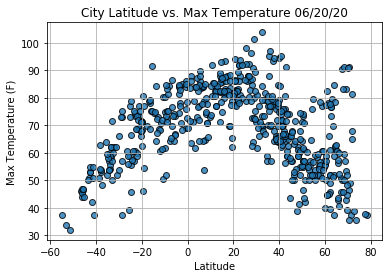

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

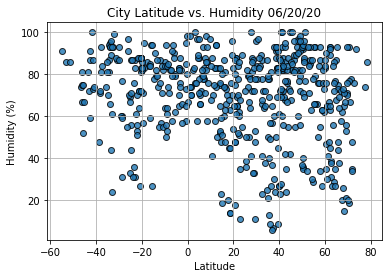

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

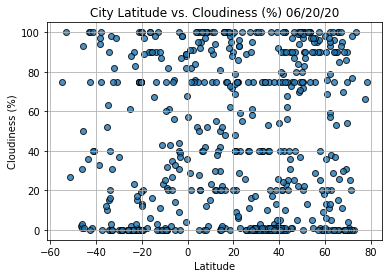

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

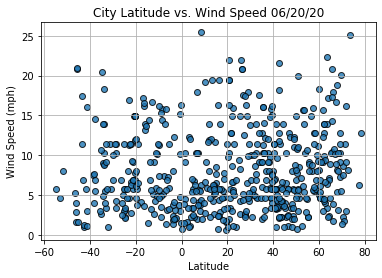

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

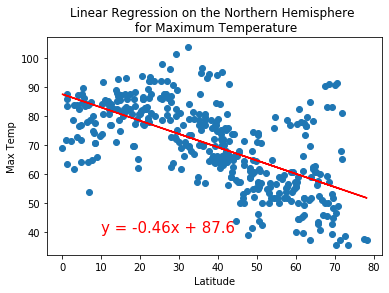

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

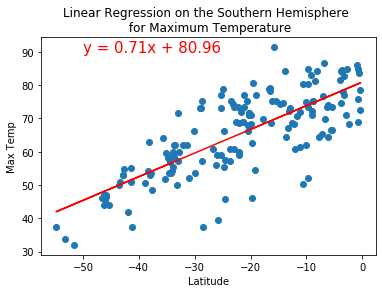

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

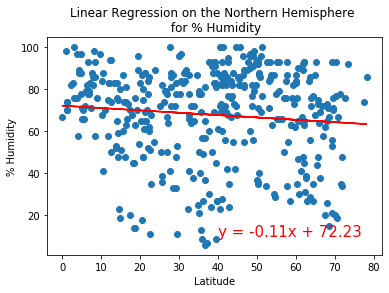

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

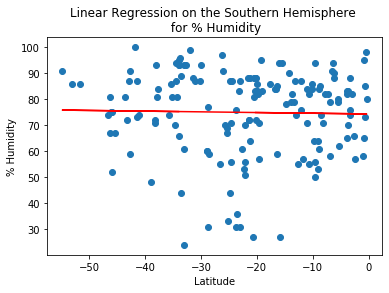

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

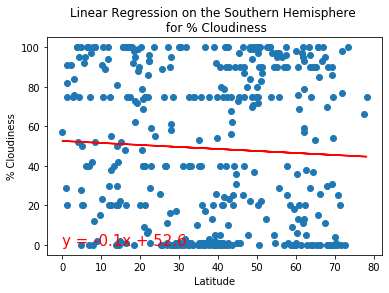

In [27]:
# Linear regression on the Northern Hemisphere for % of Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,0))

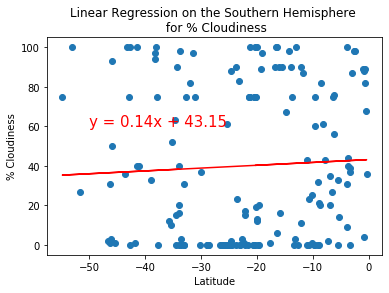

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

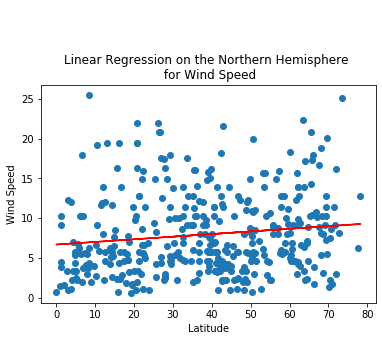

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

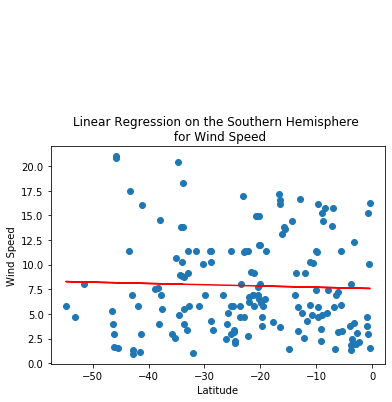

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [31]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

In [32]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df=pd.read_csv("weather_data/cities.csv")

In [33]:
# Get the data type for city_data_df
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [34]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [35]:
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Barrow,US,2020-06-21 03:58:16,71.29,-156.79,37.40,78,20,11.41
1,1,Hilo,US,2020-06-21 03:58:16,19.73,-155.09,80.60,54,90,11.41
2,2,Kruisfontein,ZA,2020-06-21 03:58:16,-34.00,24.73,54.14,95,20,8.88
3,3,Chokurdakh,RU,2020-06-21 03:58:16,70.63,147.92,91.33,19,0,8.68
4,4,Hobart,AU,2020-06-21 03:54:42,-42.88,147.33,53.01,87,75,6.93
...,...,...,...,...,...,...,...,...,...,...
550,550,Fairview,US,2020-06-21 04:00:12,40.81,-74.00,75.20,73,1,3.36
551,551,Konevo,RU,2020-06-21 04:00:13,62.12,39.32,49.21,65,13,4.50
552,552,Nurota,UZ,2020-06-21 04:00:13,40.56,65.69,84.20,23,0,11.41
553,553,Quatre Cocos,MU,2020-06-21 04:00:13,-20.21,57.76,71.01,88,75,14.99


In [36]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [41]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Hilo,US,2020-06-21 03:58:16,19.73,-155.09,80.60,54,90,11.41
7,7,Bengkulu,ID,2020-06-21 03:53:38,-3.80,102.27,84.31,65,100,1.90
10,10,Sola,VU,2020-06-21 03:58:17,-13.88,167.55,84.20,79,90,6.93
13,13,Butaritari,KI,2020-06-21 03:58:18,3.07,172.79,83.82,76,76,12.33
17,17,Lumding,IN,2020-06-21 03:58:18,25.75,93.17,86.07,82,0,2.59
...,...,...,...,...,...,...,...,...,...,...
545,545,Ormara,PK,2020-06-21 04:00:11,25.21,64.64,86.32,72,26,9.37
549,549,Hay River,CA,2020-06-21 04:00:12,60.82,-115.80,82.40,30,20,9.17
550,550,Fairview,US,2020-06-21 04:00:12,40.81,-74.00,75.20,73,1,3.36
552,552,Nurota,UZ,2020-06-21 04:00:13,40.56,65.69,84.20,23,0,11.41


In [42]:
preferred_cities_df.notnull().sum()

City_ID       183
City          183
Country       183
Date          183
Lat           183
Lng           183
Max Temp      183
Humidity      183
Cloudiness    183
Wind Speed    183
dtype: int64

In [43]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Hilo,US,80.60,19.73,-155.09,
7,Bengkulu,ID,84.31,-3.80,102.27,
10,Sola,VU,84.20,-13.88,167.55,
13,Butaritari,KI,83.82,3.07,172.79,
17,Lumding,IN,86.07,25.75,93.17,
21,Tanout,NE,85.60,14.97,8.89,
22,Kapaa,US,78.80,22.08,-159.32,
27,Bossier City,US,84.20,32.52,-93.73,
39,Cancun,MX,82.99,21.17,-86.85,
52,San Patricio,MX,78.89,19.22,-104.70,


In [44]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [45]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping.")

Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.


In [46]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Hilo,US,80.60,19.73,-155.09,Hilo Hawaiian Hotel
7,Bengkulu,ID,84.31,-3.80,102.27,Grage Hotel Bengkulu
10,Sola,VU,84.20,-13.88,167.55,Leumerus Bungalows
13,Butaritari,KI,83.82,3.07,172.79,Isles Sunset Lodge
17,Lumding,IN,86.07,25.75,93.17,Hotel Nilamber
...,...,...,...,...,...,...
545,Ormara,PK,86.32,25.21,64.64,
549,Hay River,CA,82.40,60.82,-115.80,Ptarmigan Inn Hotels
550,Fairview,US,75.20,40.81,-74.00,Homewood Suites by Hilton Edgewater-NYC Area
552,Nurota,UZ,84.20,40.56,65.69,Guest House Ruslan Nurata & Tours


In [47]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, 
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)


# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))